In [ ]:
import numpy as np
from astropy import units as u
from astropy.constants import k_B
from astropy.constants import c
from astropy.constants import h
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import io
from google.colab import files
import matplotlib.pyplot as plt

lambda peak is: 555
FWHM is:


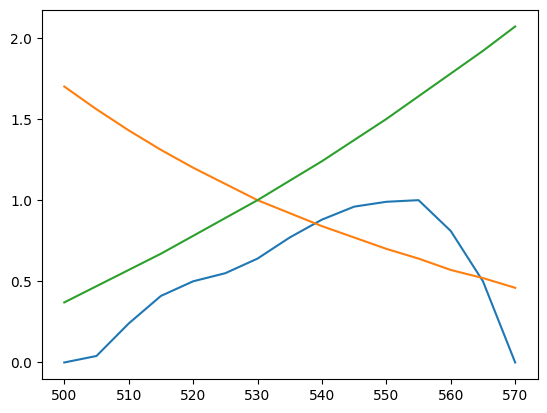

In [ ]:
lamb = [500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570]
flux = [0, 0.04, 0.24, 0.41, 0.5, 0.55, 0.64, 0.77, 0.88, 0.96, 0.99, 1, 0.81, 0.5, 0]
a = [1.7, 1.56, 1.43, 1.31, 1.2, 1.1, 1, 0.92, 0.84, 0.77, 0.7, 0.64, 0.57, 0.52, 0.46]
b = [0.37, 0.47, 0.57, 0.67, 0.78, 0.89, 1, 1.12, 1.24, 1.37, 1.5, 1.64, 1.78, 1.92, 2.07]

print("lambda peak is:", lamb[np.argmax(flux)])
print("FWHM is:")
plt.plot(lamb, flux)
plt.plot(lamb, a)
plt.plot(lamb, b)


In [ ]:
lamb = [500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570]
flux = [0, 0.04, 0.24, 0.41, 0.5, 0.55, 0.64, 0.77, 0.88, 0.96, 0.99, 1, 0.81, 0.5, 0]

np.where(max(flux))



(array([0]),)

In [ ]:
J = 1.85
p = 2
z = 0.00503
mu = 1.445
dt = 148
theta = 1.55

DA = ((3e8*(J)**(1*p)*dt)/((1+z)**2.0*np.sqrt(mu**2*dt**2.0 + theta**2.0)))

DA

703440561.6668413

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df1 = pd.read_csv('/content/drive/MyDrive/Colab/cygx3.csv', header = 0)
df2 = pd.read_csv('/content/drive/MyDrive/Colab/FORUPPER.csv', header = 0)
df3 = pd.read_csv('/content/drive/MyDrive/Colab/lightcurve.dat', header = 1, sep = '\s+', names = ['time', 'flux'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1

,Date(UTC),Julian Date,MET,TS,Photon Flux [0.1-100 GeV](photons cm-2 s-1),Photon Flux Error(photons cm-2 s-1),Photon Index,Photon Index Error,Sun Distance,Fit Tolerance,MINUIT Return Code,Analysis Log
0,Aug 08 2008,2454687,239889601,7.44,2.070000e-07,8.200000e-08,-2.96,-,159.98,1.000000e-08,0,bin1.log
1,Aug 15 2008,2454694,240494401,35.43,3.940000e-07,7.700000e-08,-2.96,-,154.10,1.000000e-08,0,bin2.log
2,Aug 22 2008,2454701,241099201,14.28,2.460000e-07,7.400000e-08,-2.96,-,147.75,1.000000e-08,0,bin3.log
3,Aug 29 2008,2454708,241704001,24.24,3.760000e-07,8.600000e-08,-2.96,-,141.17,1.000000e-08,0,bin4.log
4,Sep 05 2008,2454715,242308801,8.69,2.500000e-07,9.300000e-08,-2.96,-,134.48,1.000000e-08,0,bin5.log
...,...,...,...,...,...,...,...,...,...,...,...,...
684,Aug 11 2023,2460169,713448001,14.54,2.680000e-07,7.800000e-08,-2.96,-,158.07,1.000000e-08,0,bin784.log
685,Aug 18 2023,2460176,714052801,26.57,3.990000e-07,8.900000e-08,-2.96,-,151.99,1.000000e-08,0,bin785.log
686,Aug 25 2023,2460183,714657601,15.20,2.900000e-07,8.300000e-08,-2.96,-,145.54,1.000000e-08,0,bin786.log
687,Sep 01 2023,2460189,715262401,11.44,2.640000e-07,8.600000e-08,-2.96,-,138.92,1.000000e-08,0,bin787.log


In [ ]:
flux = df1['Photon Flux [0.1-100 GeV](photons cm-2 s-1)']
t = df1['Julian Date'] - df1['Julian Date'][0]
flux_err = df1['Photon Flux Error(photons cm-2 s-1)']
flux_mean = np.mean(flux)
x = flux - flux_mean
n = len(df1)
del_t = 30        # don't set this below than the difference of each date.
f_j = np.zeros(n)
dft = np.zeros(n)
dft_noise = np.zeros(n)

bin_s = 20
mean_freq = []
tru_psd = []
std_psd = []

for j in range(n):
  f_j[j] = j/(n*del_t)
  dft[j] = (sum(x * np.cos(2*np.pi*f_j[j]*t))**2) + (sum(x * np.sin(2*np.pi*f_j[j]*t))**2)
  err_sig = np.mean(flux_err**2)
  #Pnoise = (2*del_t*err_sig) / (flux_mean**2)
  #dft_noise = dft - Pnoise

#f_j = np.log10(f_j)
#dft = np.log10(dft)
for i in range(0, n, bin_s):
  k = i + bin_s - 1
  mean_freq.append(np.nanmean(f_j[i:k]))
  tru_psd.append(np.nanmean(dft[i:k])+0.25068)
  std_psd.append(np.nanstd(dft[i:k]/1))

mean_freq = np.array(mean_freq)
tru_psd = np.array(tru_psd)
std_psd = np.array(std_psd)


<ipython-input-4-4818d28c84f3>:24: RuntimeWarning: divide by zero encountered in log10
  f_j = np.log10(f_j)


In [ ]:
def broken_power_law(x, a, b, c, xb):
  if x < xb:
    y = lambda x: b*(x)+a
  if x > xb:
    y = lambda x: c*x + (c-b)*xb +a
  return y

param_bounds = ([-10, -10, -10, -10], [10, 10, 10, 10])
popt, pcov = curve_fit(broken_power_law, f_j[2:], dft[2:], bounds = param_bounds)
print(popt)
plt.scatter(f_j[2:], dft[2:], s=2, color='blue', label='Data')
plt.plot(f_j[2:], broken_power_law(f_j[2:], *popt), color='red', label='Fit')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

ValueError: ignored

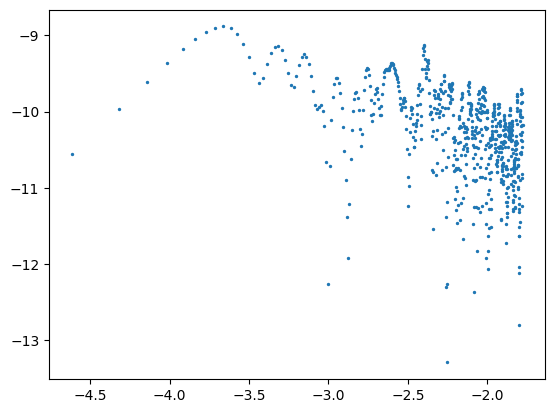

In [ ]:
plt.scatter(f_j, dft, s=2)
#plt.plot(f_j, func(f_j, *popt1), color='red', linewidth=2, alpha = 0.6)

<ErrorbarContainer object of 3 artists>

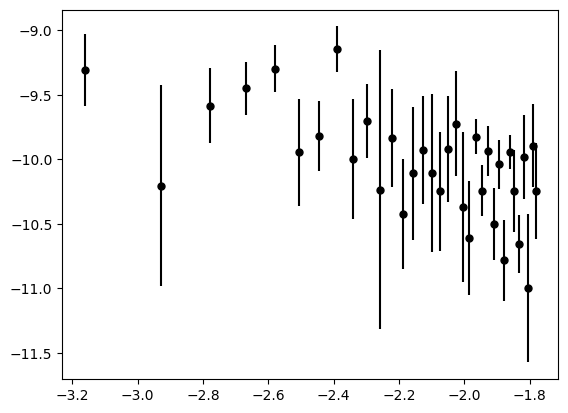

In [ ]:
plt.errorbar(mean_freq,tru_psd, yerr=std_psd, fmt='k.', markersize = 10)

In [ ]:
k = np.array([1,2,3])
p = 0
if (k > 2).any():
  p = k
  print(p)
if (k < 2).any():
  p = k
  print(p)

[1 2 3]
[1 2 3]


In [ ]:
data_list = [x for x in df2['Photon Flux [0.1-100 GeV](photons cm-2 s-1)'] if "<" in x]
cleaned_data_list = [item.replace("<", "").strip() for item in data_list]

float_list = [float(item) for item in cleaned_data_list]

print(float_list)

[2.14e-07, 2.25e-07, 3.08e-07, 1.52e-07, 2.63e-07, 1.86e-07, 2.57e-07, 2.7e-07, 3.14e-07, 2.07e-07, 2.86e-07, 2.64e-07, 3.28e-07, 2.82e-07, 2.66e-07, 3.27e-07, 2.73e-07, 3.02e-07, 3e-07, 3.2e-07, 2.31e-07, 2.11e-07, 2.92e-07, 2.62e-07, 2.48e-07, 1.81e-07, 2.94e-07, 2.58e-07, 2.43e-07, 2.1e-07, 3.15e-07, 2.34e-07, 2.43e-07, 5.2e-07, 3.28e-07, 3.23e-07, 4.29e-07, 4e-07, 6.04e-07, 1.76e-07, 2.44e-07, 2.21e-07, 5.67e-07, 4.45e-07, 2.59e-07, 4.02e-07, 2.09e-07, 3.81e-07, 2.91e-07, 3.42e-07, 3.01e-07, 2.14e-07, 3.19e-07, 2.84e-07, 1.33e-07, 2.62e-07, 2.84e-07, 3.3e-07, 3.21e-07, 3.86e-07, 2.44e-07, 3.19e-07, 3.22e-07, 2.8e-07, 2.26e-07, 3.15e-07, 3.24e-07, 4.53e-06, 1.13e-06, 2.42e-07, 2.81e-07, 2.56e-07, 2.74e-07, 2.47e-07, 2.01e-07, 2.58e-07, 2.52e-07, 3.3e-07, 3.11e-07, 2.15e-07, 1.61e-07, 2.65e-07, 2.28e-07, 2.12e-07, 2.53e-07, 2.15e-07, 1.96e-07, 2.19e-07, 1.62e-07, 2.34e-07, 1.24e-07, 2.48e-07, 1.89e-07]


In [ ]:
a = np.mean(float_list)
b = np.median(float_list)
c = np.std(float_list)

print(a+ c)

7.849117176288213e-07


In [ ]:
a_ = float_list / c

print(a_)

[0.47169197 0.49593782 0.67888377 0.33503355 0.5796962  0.40997526
 0.56647119 0.59512538 0.69210877 0.45626279 0.63039207 0.58190037
 0.72296713 0.6215754  0.58630871 0.72076296 0.60173788 0.66565876
 0.66125042 0.70533378 0.50916282 0.46507946 0.64361708 0.57749203
 0.54663368 0.39895442 0.64802541 0.56867536 0.53561284 0.4628753
 0.69431294 0.51577533 0.53561284 1.1461674  0.72296713 0.71194629
 0.9455881  0.88166723 1.33131752 0.38793358 0.53781701 0.48712114
 1.2497633  0.98085479 0.57087953 0.88607556 0.46067113 0.83978804
 0.64141291 0.75382548 0.66345459 0.47169197 0.70312961 0.62598373
 0.29315435 0.57749203 0.62598373 0.72737546 0.70753795 0.85080888
 0.53781701 0.70312961 0.70974212 0.61716706 0.49814198 0.69431294
 0.71415046 9.98488136 2.49070992 0.53340867 0.61937123 0.56426703
 0.60394205 0.54442951 0.44303778 0.56867536 0.55545035 0.72737546
 0.68549627 0.47389614 0.35487106 0.58410454 0.50255032 0.46728363
 0.55765452 0.47389614 0.43201694 0.48271281 0.35707523 0.51577

93
783


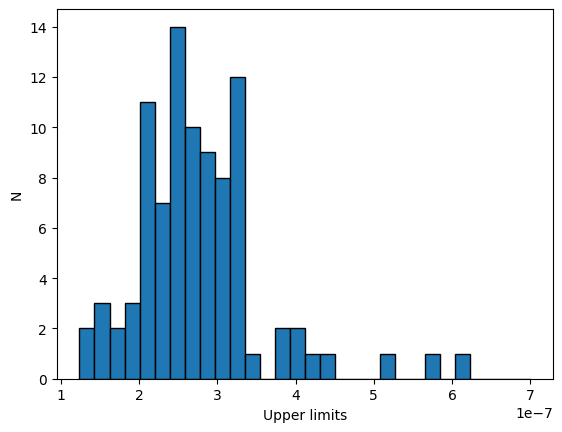

In [ ]:
plt.hist(float_list, bins=30, edgecolor='black', range = (min(float_list),0.7e-06))
plt.xlabel("Upper limits")
plt.ylabel("N")
print(len(float_list))
print(len(df2))

In [ ]:
limits = 0.5 * max(df3['flux'])
K_filtered = df3[df3['flux'] > limits]
print(K_filtered)

       time      flux
16    126.0  0.000001
17    133.0  0.000001
18    140.0  0.000001
19    146.0  0.000002
29    225.0  0.000001
30    232.0  0.000001
31    253.0  0.000001
182  1456.0  0.000001
211  1681.0  0.000001
251  2052.0  0.000001
252  2059.0  0.000001
306  2507.0  0.000001
309  2542.0  0.000001
314  2583.0  0.000001
315  2590.0  0.000001
395  3207.0  0.000001
435  3564.0  0.000002
501  4067.0  0.000001
511  4151.0  0.000001
512  4158.0  0.000001
513  4165.0  0.000001
536  4326.0  0.000001
537  4333.0  0.000001
540  4355.0  0.000001
541  4362.0  0.000001
542  4369.0  0.000001
561  4501.0  0.000001
574  4593.0  0.000001
578  4620.0  0.000001
661  5278.0  0.000002


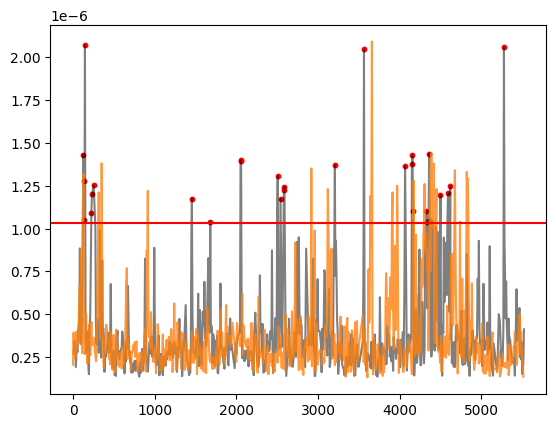

In [ ]:
plt.plot(df3['time'], df3['flux'], c = 'k', alpha = 0.5)
plt.plot(t, flux, c = 'tab:orange', alpha = 0.8)
plt.axhline(y = limits, color='r', linestyle='-')
#plt.axhline(y= a + c, color='g', linestyle=':')
#plt.axhline(y= a - c, color='g', linestyle=':')
plt.scatter(K_filtered['time'], K_filtered['flux'], c = 'r', s = 10)

In [ ]:
flux_K = K_filtered['flux']
flux_mean_K = np.mean(K_filtered['flux'])
x = flux_K - flux_mean_K
n = len(K_filtered['flux'])
del_t = 30        # don't set this below than the difference of each date.
f_j = np.zeros(n)
dft = np.zeros(n)
dft_noise = np.zeros(n)

bin_s = 20
mean_freq = []
tru_psd = []
std_psd = []

for j in range(n):
  f_j[j] = j/(n*del_t)
  dft[j] = (sum(x * np.cos(2*np.pi*f_j[j]*t))**2) + (sum(x * np.sin(2*np.pi*f_j[j]*t))**2)
  err_sig = np.mean(flux_err**2)
  #Pnoise = (2*del_t*err_sig) / (flux_mean**2)
  #dft_noise = dft - Pnoise

#f_j = np.log10(f_j)
#dft = np.log10(dft)
for i in range(0, n, bin_s):
  k = i + bin_s - 1
  mean_freq.append(np.nanmean(f_j[i:k]))
  tru_psd.append(np.nanmean(dft[i:k])+0.25068)
  std_psd.append(np.nanstd(dft[i:k]/1))

mean_freq = np.array(mean_freq)
tru_psd = np.array(tru_psd)
std_psd = np.array(std_psd)
